In [1]:
from dataset.dataset import MultipleImageDataset

dataset = MultipleImageDataset("dataset/data")

In [25]:
import hashlib

def calculate_hash(file_path, hash_function=hashlib.md5):
    hash_obj = hash_function()
    with open(file_path, 'rb') as f:
        while chunk := f.read(8192):
            hash_obj.update(chunk)
    return hash_obj.hexdigest()

def find_duplicate_images(files):
    hash_map = {}
    duplicates = []

    for file in files:
        try:
            file_hash = calculate_hash(file)
            if file_hash in hash_map:
                duplicates.append((hash_map[file_hash], file))
            else:
                hash_map[file_hash] = file
        except Exception as e:
            print(f"Error processing file {file}: {e}")

    return duplicates

In [26]:
print("total images: ", len(dataset))

duplicates = find_duplicate_images(dataset.image_paths)

print(len(duplicates)) # 중복 이미지 쌍

print(sum([len(d) for d in duplicates])) # 총 중복 이미지 갯수

total images:  11492
399
798


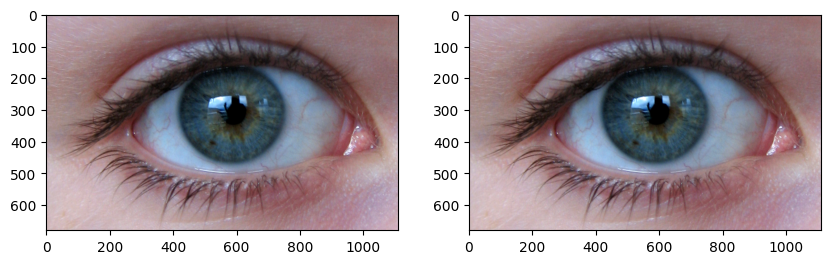

In [27]:
from PIL import Image
import matplotlib.pyplot as plt

image1 = Image.open(duplicates[0][0])
image2 = Image.open(duplicates[0][1])

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1)

plt.subplot(1, 2, 2)
plt.imshow(image2)

plt.show()